## Indicator Comparison between two countries

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import pycountry
import plotly.graph_objects as go
import plotly.express as px



#### API login


In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

### Function to Import and Plot Data

In [3]:
def getIndicatorsComparisonTwoCountries(country1, country2, indicators_highest, indicators_lowest):
        
    frames = []
    if indicators_highest:
        for indicator in indicators_highest:
            df_country1 = te.getIndicatorData(country=country1, indicators=indicator, output_type='df')
            df_country2 = te.getIndicatorData(country=country2, indicators=indicator, output_type='df')
            frames.append(df_country1)
            frames.append(df_country2)

    if indicators_lowest:
        for indicator in indicators_lowest:
            df_country1 = te.getIndicatorData(country=country1, indicators=indicator, output_type='df')
            df_country2 = te.getIndicatorData(country=country2, indicators=indicator, output_type='df')
            frames.append(df_country1)
            frames.append(df_country2)



    df = pd.concat(frames)
    df
    fig = px.bar(df, x="Category", y="LatestValue", color="Country", title=f"{country1.capitalize() } and {country2.capitalize() } Indicators Comparison",text='LatestValue',barmode='group', height=500)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    
    

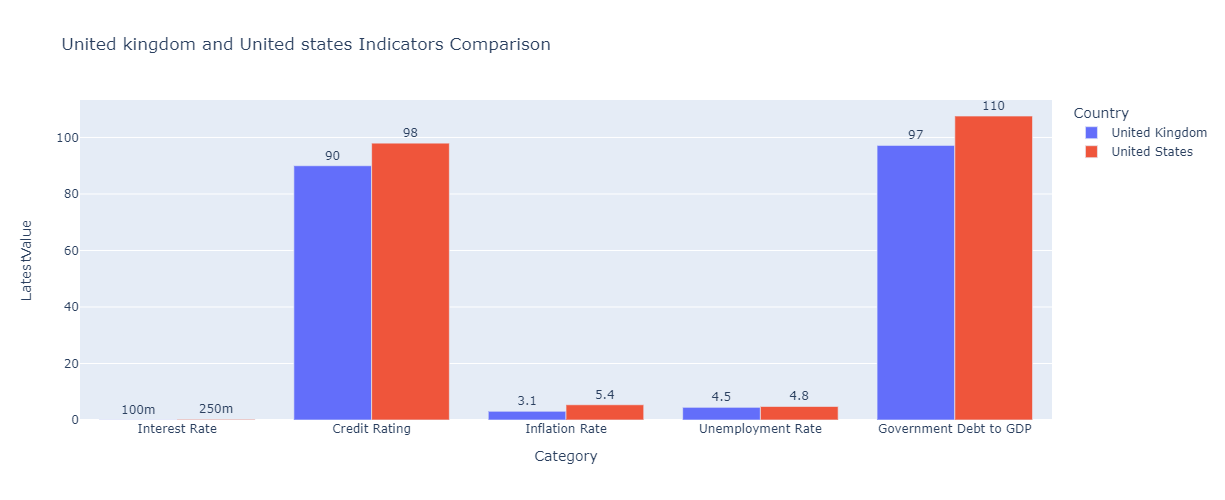

In [6]:
country1 = 'united kingdom'
country2 = 'united states'
indicators_highest = ['Interest Rate','Credit Rating']
indicators_lowest = ['Inflation Rate','Unemployment Rate','Government Debt to GDP']
getIndicatorsComparisonTwoCountries(country1, country2,indicators_highest,indicators_lowest)